In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/groceries-dataset/Groceries_dataset.csv


In [3]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori

In [4]:
df = pd.read_csv("/kaggle/input/groceries-dataset/Groceries_dataset.csv")
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 38765
Number of Columns: 3


In [8]:
df.isnull().sum()
#Eksik değer kontrolü

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [42]:
df["Year"]=pd.to_datetime(df["Date"]).dt.year
df["Month"]=pd.to_datetime(df["Date"]).dt.month
df["Week Day"]=pd.to_datetime(df["Date"]).dt.weekday
df
#yıl, ay ve hafta günü bazlı analiz yapılması

/tmp/ipykernel_31/3820085507.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Year"]=pd.to_datetime(df["Date"]).dt.year
/tmp/ipykernel_31/3820085507.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Month"]=pd.to_datetime(df["Date"]).dt.month
/tmp/ipykernel_31/3820085507.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Week Day"]=pd.to_datetime(df["Date"]).dt.weekday


,Member_number,Date,itemDescription,Year,Month,Week Day
0,1808,21-07-2015,tropical fruit,2015,7,1
1,2552,05-01-2015,whole milk,2015,1,0
2,2300,19-09-2015,pip fruit,2015,9,5
3,1187,12-12-2015,other vegetables,2015,12,5
4,3037,01-02-2015,whole milk,2015,2,6
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014,10,2
38761,2022,23-02-2014,candy,2014,2,6
38762,1097,16-04-2014,cake bar,2014,4,2
38763,1510,03-12-2014,fruit/vegetable juice,2014,12,2


In [43]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
Year                int32
Month               int32
Week Day            int32
dtype: object

In [11]:
df["Month"]=df["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January ','February','March','April' ,'May' ,'June'  ,'July' ,'August','September','October','November','December'))
df["Week Day"]=df["Week Day"].replace((0,1,2,3,4,5,6),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
df

,Member_number,Date,itemDescription,Year,Month,Week Day
0,1808,21-07-2015,tropical fruit,2015,July,Tuesday
1,2552,05-01-2015,whole milk,2015,January,Monday
2,2300,19-09-2015,pip fruit,2015,September,Saturday
3,1187,12-12-2015,other vegetables,2015,December,Saturday
4,3037,01-02-2015,whole milk,2015,February,Sunday
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014,October,Wednesday
38761,2022,23-02-2014,candy,2014,February,Sunday
38762,1097,16-04-2014,cake bar,2014,April,Wednesday
38763,1510,03-12-2014,fruit/vegetable juice,2014,December,Wednesday


In [44]:
bestselling=df["itemDescription"].value_counts().reset_index(name='Quantity').head(15)
bestselling.rename(columns={"index":"Item"},inplace=True)
bestselling

# en çok satılan 15 ürün

,itemDescription,Quantity
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
5,root vegetables,1071
6,tropical fruit,1032
7,bottled water,933
8,sausage,924
9,citrus fruit,812


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


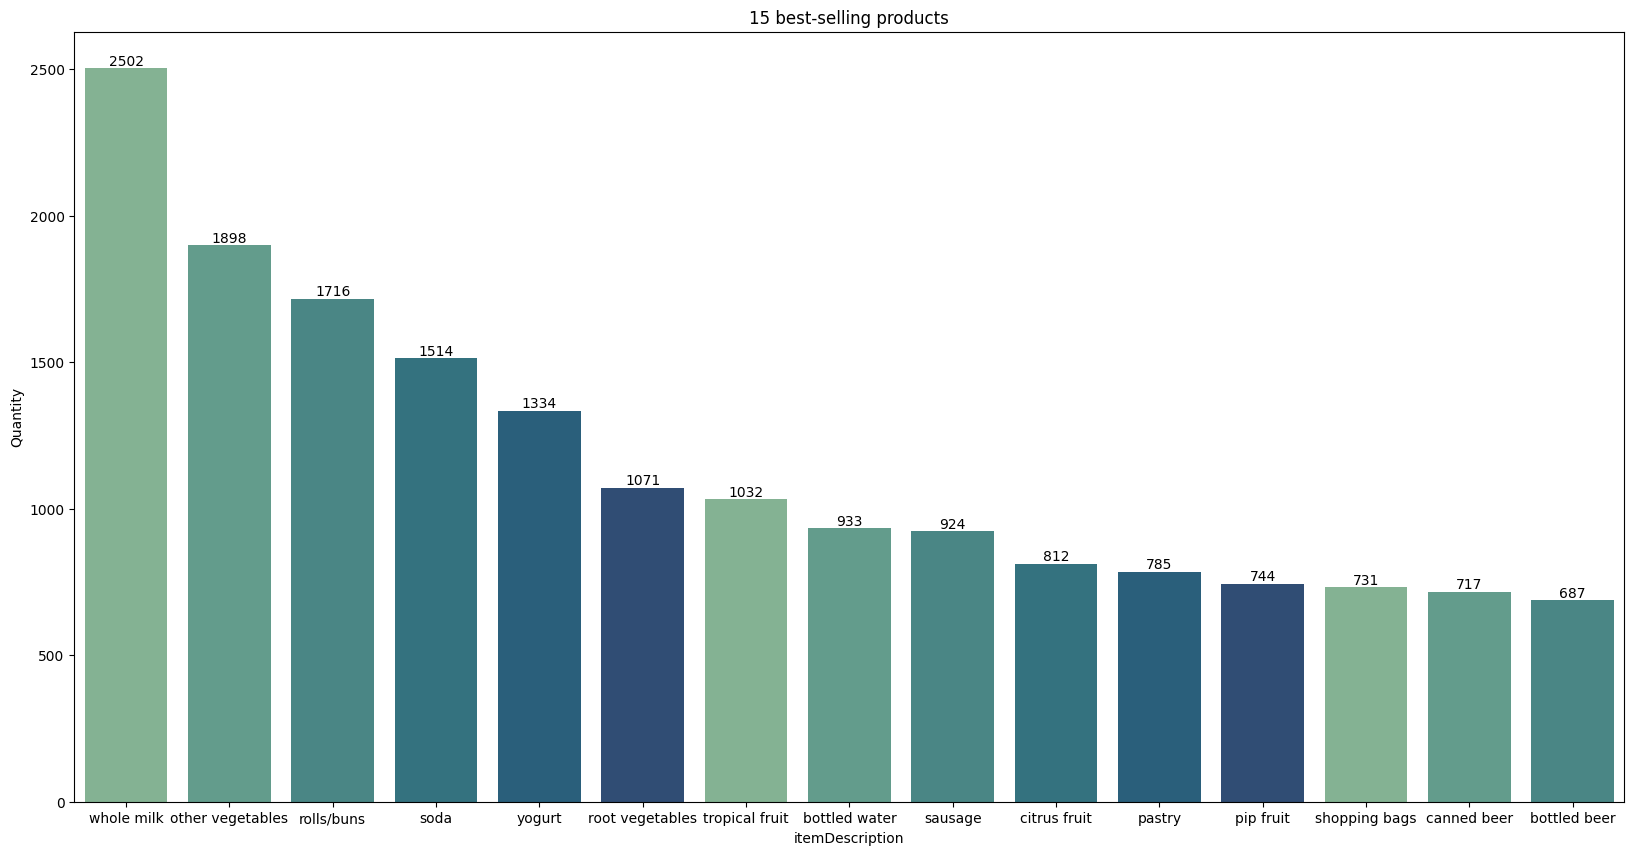

In [13]:
plt.figure(figsize=(20,10))
colors=sns.color_palette('crest')
ax=sns.barplot(x="itemDescription",y="Quantity",data=bestselling,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.title("15 best-selling products")
plt.show()

In [45]:
datayears=df.groupby("Year")["itemDescription"].count().reset_index() 
datayears

#yıllık bazda ürün satış (işlem) hacmi

,Year,itemDescription
0,2014,18277
1,2015,20488


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


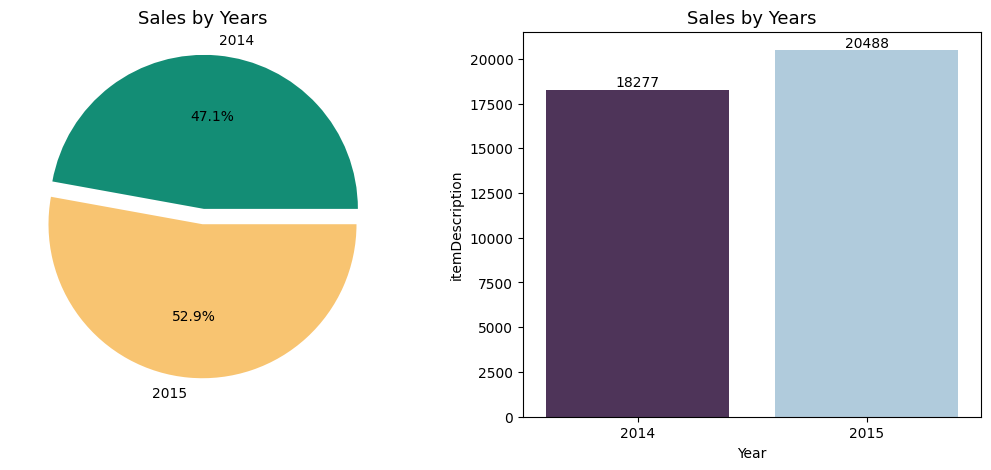

In [15]:
datayearsy=datayears["Year"].tolist()
dataitem=datayears["itemDescription"].tolist()
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
explode=(0.1,0)
colors=sns.color_palette('Paired')
plt.pie(dataitem,labels=datayearsy,autopct='%1.1f%%',explode=explode,colors=("#138D75","#F8C471"))
plt.title('Sales by Years',size=13)
### Bar chart
plt.subplot(1,2,2)
ax=sns.barplot(x="Year",y="itemDescription",data=datayears,palette=("#512E5F","#A9CCE3"))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years',size=13)    
plt.show()

In [46]:
datamonth=df.groupby('Month')['itemDescription'].count().reset_index()
datamonth.rename(columns={"itemDescription":"Quantity"},inplace = True)
datamonth

#aylara göre toplam satış hacmi

,Month,Quantity
0,1,3324
1,2,2997
2,3,3133
3,4,3260
4,5,3408
5,6,3264
6,7,3300
7,8,3496
8,9,3059
9,10,3261


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


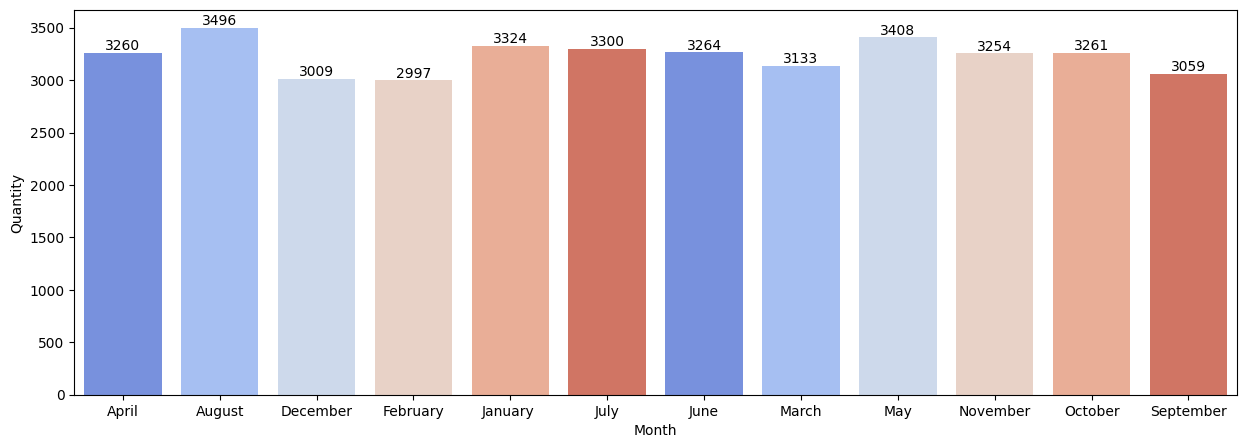

In [17]:
plt.figure(figsize=(15,5))
colors=sns.color_palette("coolwarm")
ax=sns.barplot(x="Month",y="Quantity",data=datamonth,palette=colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show() 

Total product sales by Week Day

In [47]:
weekday=df.groupby('Week Day')['itemDescription'].count().reset_index(name="Quantity")
weekday

# haftanın hangi günlerinde satışlar daha yoğun 

,Week Day,Quantity
0,0,5382
1,1,5558
2,2,5562
3,3,5620
4,4,5562
5,5,5551
6,6,5530


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


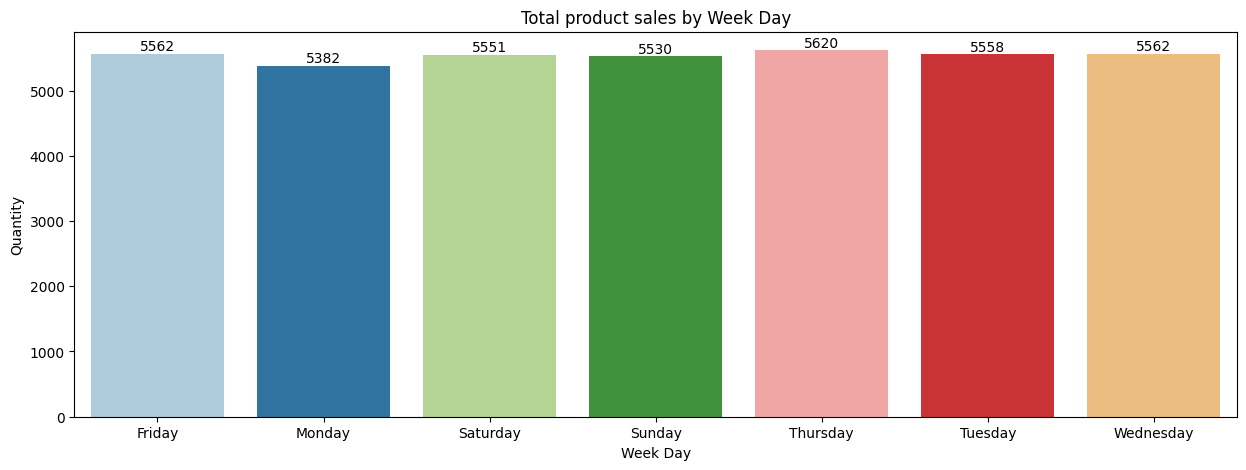

In [19]:
plt.figure(figsize=(15,5))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Week Day",y="Quantity",data=weekday,palette=colors)
plt.title("Total product sales by Week Day")
for i in ax.containers:
    ax.bar_label(i)
plt.show() 

In [48]:
productsales=df.groupby(["Month","itemDescription"])["itemDescription"].count().reset_index(name="Quantity").sort_values(["Month","Quantity"],ascending=False)
productsales

#Aylara göre kaç adet ürün satıldı?

,Month,itemDescription,Quantity
1809,12,whole milk,189
1753,12,other vegetables,160
1771,12,rolls/buns,121
1784,12,soda,113
1810,12,yogurt,93
...,...,...,...
79,1,make up remover,1
93,1,organic products,1
106,1,potato products,1
115,1,salad dressing,1


In [49]:
productsales=df.groupby(["Month","itemDescription"])["itemDescription"].count().reset_index(name="Quantity").sort_values(["Month","Quantity"],ascending=False)
monthinfo=df["Month"].unique()

productsales

,Month,itemDescription,Quantity
1809,12,whole milk,189
1753,12,other vegetables,160
1771,12,rolls/buns,121
1784,12,soda,113
1810,12,yogurt,93
...,...,...,...
79,1,make up remover,1
93,1,organic products,1
106,1,potato products,1
115,1,salad dressing,1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

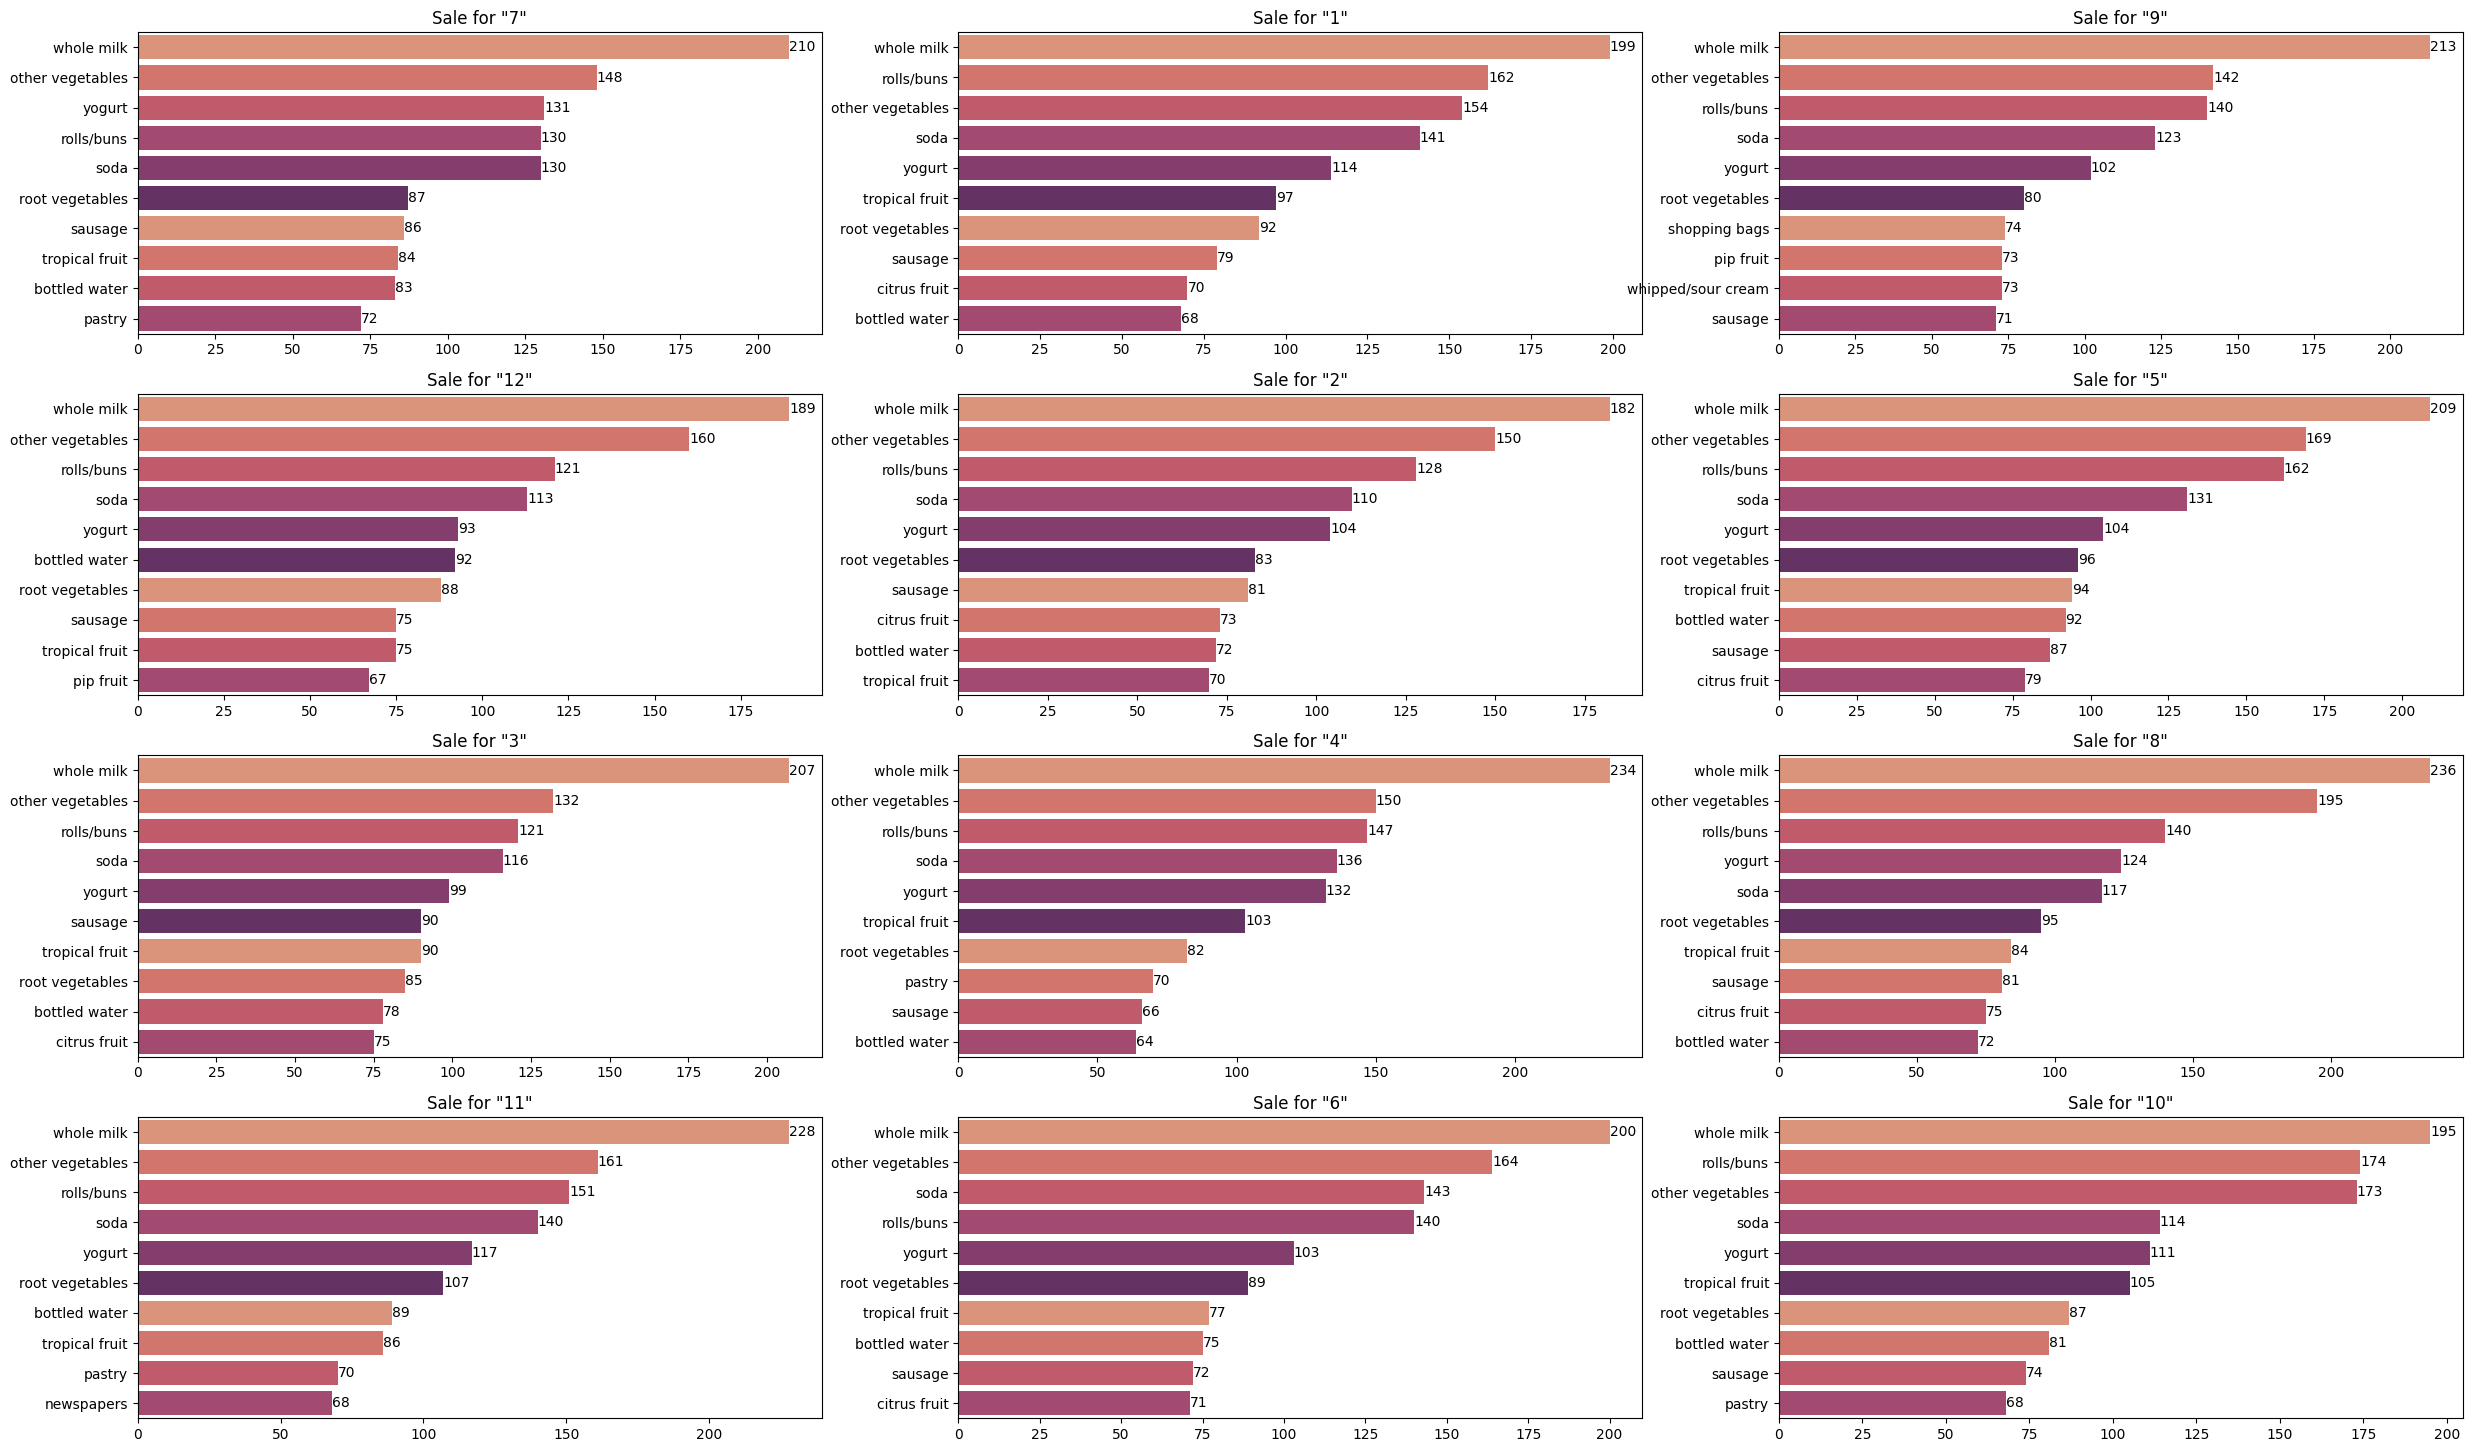

In [50]:
plt.figure(figsize=(30,18))
colors=sns.color_palette('flare')
for i,j in enumerate(monthinfo):
    plt.subplot(4,3,i+1)
    productdata=productsales[productsales["Month"]==j].head(10)
    ax=sns.barplot(x="Quantity",y="itemDescription",data=productdata,palette=colors)
    for i in ax.containers:
        ax.bar_label(i)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Sale for "{}"'.format(j))

ARL Analysis: Büyük veri setlerinde ürünler/aralarındaki öğeler arasındaki ilişkiyi keşfetmek, yani “Birlikte sıkça satın alınan ürünler hangileri?” gibi soruları cevaplamak.

In [51]:
dataquantity=df.groupby(["Member_number","itemDescription"])["itemDescription"].count().reset_index(name="Quantity")
dataquantity

,Member_number,itemDescription,Quantity
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [52]:
datapivot=dataquantity.pivot_table(index="Member_number",columns="itemDescription",values="Quantity",aggfunc="sum").fillna(0)
datapivot

# Satırlarda müşteri numarası
# Hücrelerde ürün adedi (kaç tane alındı)
# Aynı müşteri-ürün çiftinde birden fazla kayıt varsa toplar
# Boş hücreleri 0 ile doldurur (yani o üründen almayan müşteriler)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
def func(piv):
    if piv <=0:
        return 0
    if piv >=1:
        return 1
datapivot=datapivot.applymap(func)
datapivot

#miktarlar için satın alma var/yok durumu

/tmp/ipykernel_31/1220330229.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datapivot=datapivot.applymap(func)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
aprioridata=apriori(datapivot,min_support=0.01,use_colnames=True)
aprioridata

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
...,...,...
3011,0.011031,"(soda, whole milk, whipped/sour cream, yogurt)"
3012,0.010518,"(whole milk, yogurt, other vegetables, rolls/b..."
3013,0.013597,"(yogurt, whole milk, other vegetables, rolls/b..."
3014,0.010005,"(yogurt, whole milk, other vegetables, rolls/b..."


In [33]:
rules=association_rules(aprioridata,metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,1.0,0.001133,1.016672,0.116940,0.056088,0.016399,0.110985
1,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,1.0,0.001133,1.010396,0.122392,0.056088,0.010289,0.110985
2,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,1.0,0.002413,1.037933,0.176014,0.066897,0.036547,0.141621
3,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,1.0,0.002413,1.016769,0.192815,0.066897,0.016492,0.141621
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,1.0,0.004517,1.078960,0.230217,0.078598,0.073181,0.185441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15255,(whole milk),"(soda, rolls/buns, yogurt, other vegetables)",0.458184,0.020010,0.013597,0.029675,1.483002,1.0,0.004428,1.009961,0.601111,0.029266,0.009862,0.354581
15256,(yogurt),"(soda, rolls/buns, whole milk, other vegetables)",0.282966,0.031811,0.013597,0.048051,1.510499,1.0,0.004595,1.017059,0.471340,0.045145,0.016773,0.237735
15257,(soda),"(rolls/buns, other vegetables, whole milk, yog...",0.313494,0.034377,0.013597,0.043372,1.261658,1.0,0.002820,1.009403,0.302098,0.040675,0.009315,0.219447
15258,(other vegetables),"(soda, rolls/buns, whole milk, yogurt)",0.376603,0.024628,0.013597,0.036104,1.465954,1.0,0.004322,1.011905,0.509869,0.035076,0.011765,0.294093


### Metrik	Anlamı
### support= Kuralın veri kümesinde geçme oranı
### confidence=	A olduysa B olma olasılığı
### lift*=	A ve B’nin birlikte olma olasılığı / bağımsız olasılık
### leverage=	A ve B’nin birlikte görülme olasılığı ile bağımsız olasılık farkı
### conviction=	A varsa B’nin olmaması ihtimaline karşı duyarlılık
### jaccard= A ve B’nin kesişimi / birleşimi
### kulczynski=	(confidence(A→B) + confidence(B→A)) / 2
### certainty=	confidence - support(consequent)

In [34]:
print(rules.shape)       # Kaç tane kural var?
print(rules.columns)     # Hangi sütunlar var?
rules.head()

(15260, 14)
Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,1.0,0.001133,1.016672,0.116940,0.056088,0.016399,0.110985
1,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,1.0,0.001133,1.010396,0.122392,0.056088,0.010289,0.110985
2,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,1.0,0.002413,1.037933,0.176014,0.066897,0.036547,0.141621
3,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,1.0,0.002413,1.016769,0.192815,0.066897,0.016492,0.141621
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,1.0,0.004517,1.078960,0.230217,0.078598,0.073181,0.185441


Kural: (UHT-milk) → (beef)

- Support: 0.0105 → %1.05 müşteri hem süt hem de et almış.
- Confidence: 0.134 → Süt alanların %13.4’ü et de almış.
- Lift: 1.12 → Süt ve etin birlikte alınma olasılığı, rastgele alınma olasılığından %12 daha fazla.


In [37]:
rules.sort_values(by="lift", ascending=False).head(10)
#lifte göre en güçlü 10 kural

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15187,"(yogurt, rolls/buns)","(sausage, whole milk, other vegetables)",0.111339,0.050282,0.013597,0.122120,2.428689,1.0,0.007998,1.081831,0.661957,0.091854,0.075641,0.196264
15182,"(sausage, whole milk, other vegetables)","(yogurt, rolls/buns)",0.050282,0.111339,0.013597,0.270408,2.428689,1.0,0.007998,1.218025,0.619400,0.091854,0.178999,0.196264
15178,"(rolls/buns, yogurt, other vegetables)","(whole milk, sausage)",0.052335,0.106978,0.013597,0.259804,2.428575,1.0,0.007998,1.206467,0.620721,0.093310,0.171133,0.193451
15191,"(whole milk, sausage)","(rolls/buns, yogurt, other vegetables)",0.106978,0.052335,0.013597,0.127098,2.428575,1.0,0.007998,1.085650,0.658702,0.093310,0.078893,0.193451
12796,"(curd, yogurt)","(whole milk, sausage)",0.040277,0.106978,0.010005,0.248408,2.322046,1.0,0.005696,1.188173,0.593239,0.072897,0.158372,0.170966
12801,"(whole milk, sausage)","(curd, yogurt)",0.106978,0.040277,0.010005,0.093525,2.322046,1.0,0.005696,1.058742,0.637549,0.072897,0.055483,0.170966
15183,"(sausage, whole milk, rolls/buns)","(yogurt, other vegetables)",0.048743,0.120318,0.013597,0.278947,2.318415,1.0,0.007732,1.219997,0.597810,0.087459,0.180326,0.195977
15186,"(yogurt, other vegetables)","(sausage, whole milk, rolls/buns)",0.120318,0.048743,0.013597,0.113006,2.318415,1.0,0.007732,1.072451,0.646451,0.087459,0.067556,0.195977
15175,"(whole milk, yogurt, other vegetables)","(sausage, rolls/buns)",0.071832,0.082350,0.013597,0.189286,2.298554,1.0,0.007681,1.131903,0.608665,0.096715,0.116532,0.177197
15194,"(sausage, rolls/buns)","(whole milk, yogurt, other vegetables)",0.082350,0.071832,0.013597,0.165109,2.298554,1.0,0.007681,1.111724,0.615642,0.096715,0.100496,0.177197


In [39]:
rules.sort_values(by="confidence", ascending=False).head(10)
#En güvenilir 10 kural (confidence’a göre)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7020,"(meat, domestic eggs)",(whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,1.0,0.004267,2.512057,0.421328,0.022259,0.601920,0.403355
5709,"(fruit/vegetable juice, chocolate)",(whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,1.0,0.004192,2.167265,0.394760,0.023333,0.538589,0.386758
15144,"(rolls/buns, bottled water, yogurt, other vege...",(whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,1.0,0.004053,2.128564,0.390879,0.022778,0.530200,0.384205
11631,"(pip fruit, bottled water, yogurt)",(whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,1.0,0.003914,2.089863,0.386811,0.022222,0.521500,0.381569
11995,"(brown bread, yogurt, rolls/buns)",(whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,1.0,0.004834,2.046862,0.383561,0.027716,0.511447,0.381645
11127,"(bottled water, brown bread, other vegetables)",(whole milk),0.016675,0.458184,0.012057,0.723077,1.578138,1.0,0.004417,1.956559,0.372554,0.026053,0.488899,0.374696
11101,"(bottled beer, yogurt, rolls/buns)",(whole milk),0.019241,0.458184,0.013853,0.720000,1.571422,1.0,0.005038,1.935058,0.370768,0.029884,0.483220,0.375118
12807,"(soda, curd, yogurt)",(whole milk),0.015136,0.458184,0.010775,0.711864,1.553666,1.0,0.003840,1.880421,0.361838,0.023295,0.468204,0.367690
15203,"(rolls/buns, shopping bags, yogurt, other vege...",(whole milk),0.014110,0.458184,0.010005,0.709091,1.547613,1.0,0.003540,1.862494,0.358908,0.021643,0.463085,0.365464
14331,"(pip fruit, yogurt, pastry)",(whole milk),0.014879,0.458184,0.010518,0.706897,1.542823,1.0,0.003701,1.848550,0.357152,0.022740,0.459035,0.364926


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

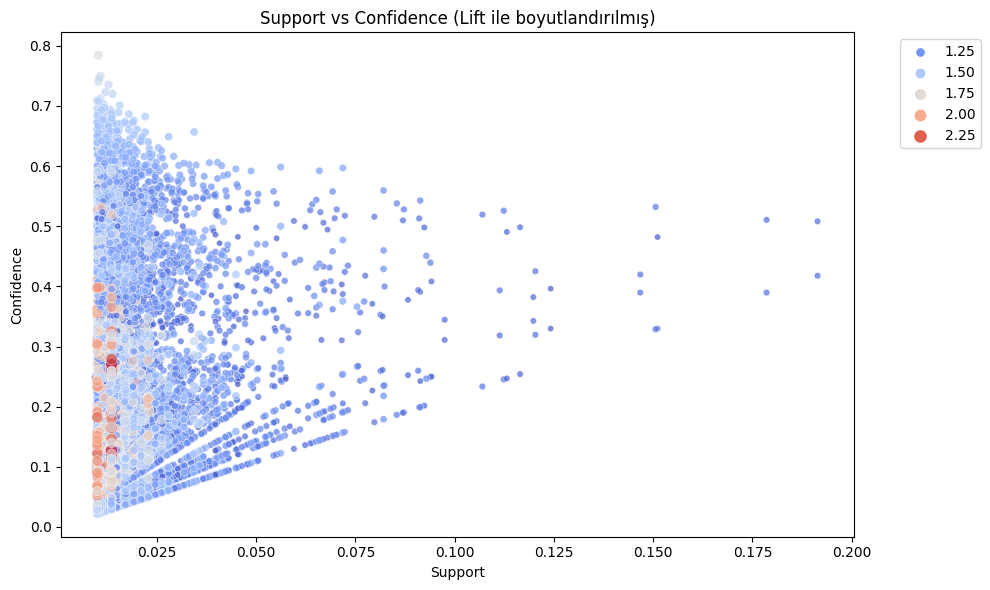

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='coolwarm', alpha=0.7)
plt.title('Support vs Confidence (Lift ile boyutlandırılmış)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


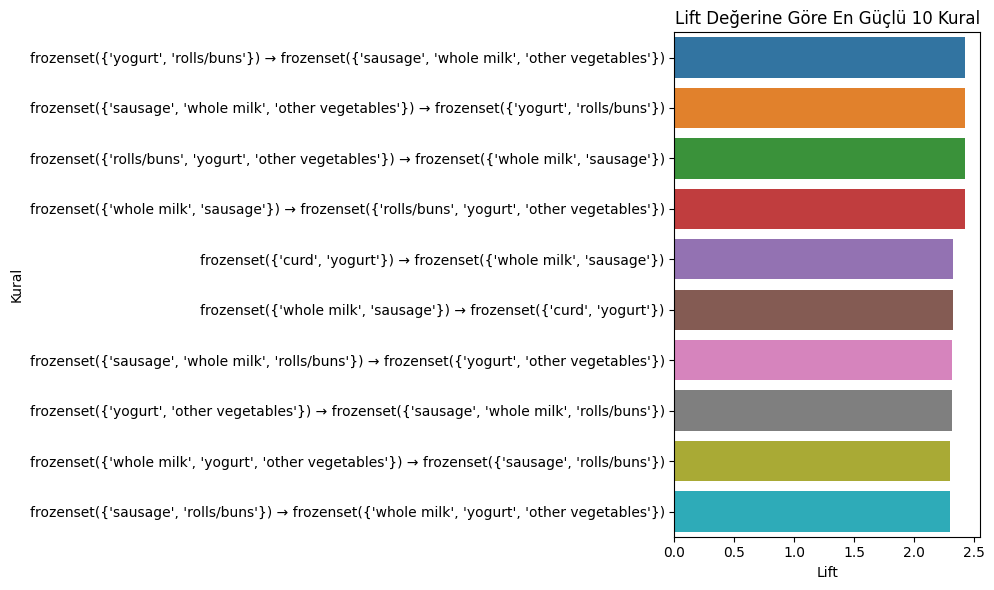

In [41]:
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str))
plt.title('Lift Değerine Göre En Güçlü 10 Kural')
plt.xlabel('Lift')
plt.ylabel('Kural')
plt.tight_layout()
plt.show()

In [54]:
import pandas as pd

data = {
    "Kural": [
        "UHT-milk → bottled water",
        "UHT-milk → bottled beer",
        "UHT-milk → beef",
        "beef → UHT-milk",
        "bottled beer → UHT-milk"
    ],
    "Support": [0.0213, 0.0149, 0.0105, 0.0105, 0.0149],
    "Confidence": ["27.1%", "18.9%", "13.4%", "8.8%", "9.4%"],
    "Lift": [1.27, 1.19, 1.12, 1.12, 1.19],
    "Yorum": [
        "Güçlü pozitif ilişki. Birlikte satın alma eğilimi yüksek.",
        "Orta düzeyde ilişki. Promosyon veya birlikte satış düşünülebilir.",
        "Hafif pozitif ilişki. Zayıf ama anlamlı birliktelik.",
        "Ters yönlü ilişki daha zayıf.",
        "Hafif ilişki. Tercihlerin uyumlu olduğunu gösteriyor."
    ]
}

df_rules = pd.DataFrame(data)
print(df_rules)


                      Kural  Support Confidence  Lift  \
0  UHT-milk → bottled water   0.0213      27.1%  1.27   
1   UHT-milk → bottled beer   0.0149      18.9%  1.19   
2           UHT-milk → beef   0.0105      13.4%  1.12   
3           beef → UHT-milk   0.0105       8.8%  1.12   
4   bottled beer → UHT-milk   0.0149       9.4%  1.19   

                                               Yorum  
0  Güçlü pozitif ilişki. Birlikte satın alma eğil...  
1  Orta düzeyde ilişki. Promosyon veya birlikte s...  
2  Hafif pozitif ilişki. Zayıf ama anlamlı birlik...  
3                      Ters yönlü ilişki daha zayıf.  
4  Hafif ilişki. Tercihlerin uyumlu olduğunu göst...  
